In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

In [23]:
iris = datasets.load_iris()
#Transformando a un dataframe de pandas
datos = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#Cambiandole los nombres a las columnas
datos.columns=["Sepal.length","Sepal.width","Petal.length","Petal.width","Specie"]
datos

,Sepal.length,Sepal.width,Petal.length,Petal.width,Specie
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Graficar las variables Petal.Length y Petal.Width

Text(0.5, 1.0, 'Petal length vs Petal width')

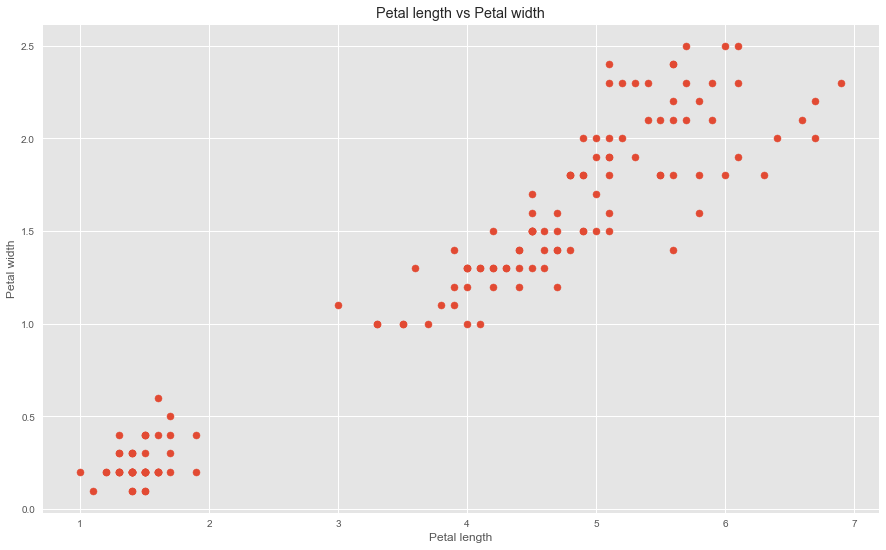

In [24]:
fig = plt.figure()
plt.scatter(datos['Petal.length'],datos['Petal.width'])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Petal length vs Petal width")

### Separando en train y test

In [25]:
Specie = datos.pop("Specie") #La variable respuesta
y = datos.pop("Petal.length") #La variable respuesta
X = datos #El resto de los datos

In [26]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

70% de entrenamiento y 30% prueba

### Haciendo la regresión lineal

In [27]:
p_length = y_train.values.reshape(-1,1)
p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['Petal.width'].values.reshape(-1,1)
p_width_t = X_test['Petal.width'].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(p_width, p_length)
p_length_pred = lm.predict(p_width_t)

#### Haciendo la ecuación

In [28]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]


label = r'$p_length = %0.4f*p_width %+0.4f$'%(m,c)
print(label)

$p_length = 2.2172*p_width +1.0819$


Text(0.5, 1.0, 'Test Set Petal length vs Petal width')

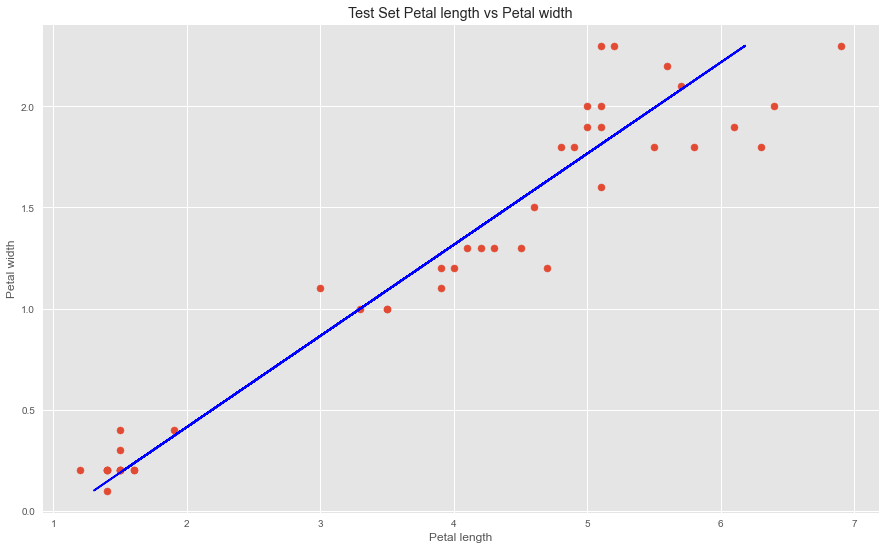

In [29]:
fig = plt.figure()
plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Test Set Petal length vs Petal width")

In [30]:
print("Mean Squared Error: %.2f"%mean_squared_error(p_length_t,p_length_pred))
print("R squared: %.2f"%r2_score(p_length_t,p_length_pred))

Mean Squared Error: 0.22
R squared: 0.93


El $R^2$ explica el 90% de la variabilidad de los datos lo que es bastante bueno

### Analizando residuales

In [31]:
residuales = p_length_t - p_length_pred
len(residuales)


45

Text(0, 0.5, 'Residuales')

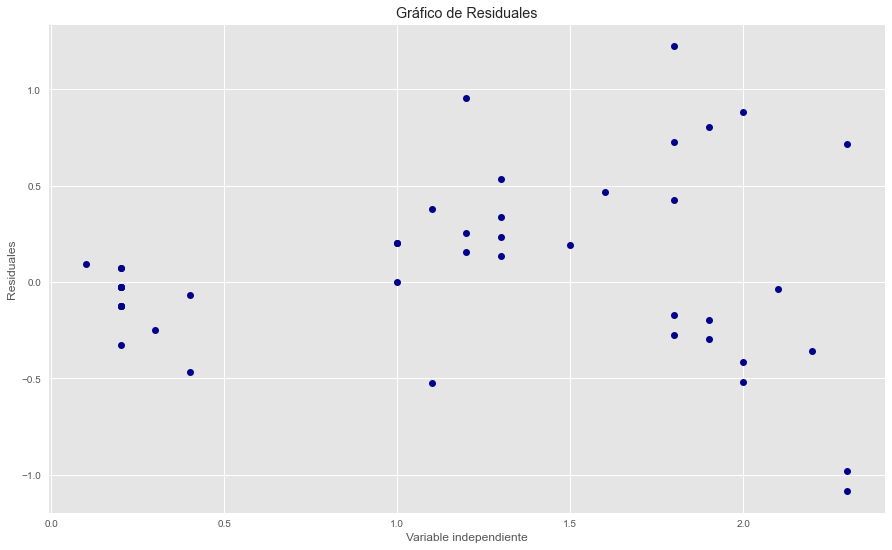

In [32]:
plt.plot(p_width_t,residuales, 'o', color='darkblue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

Según el gráfico de los residuos se puede observar que parecen estar aleatoriamente distribuidos alrededor de 0

C:\Users\flaquitqm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuales')

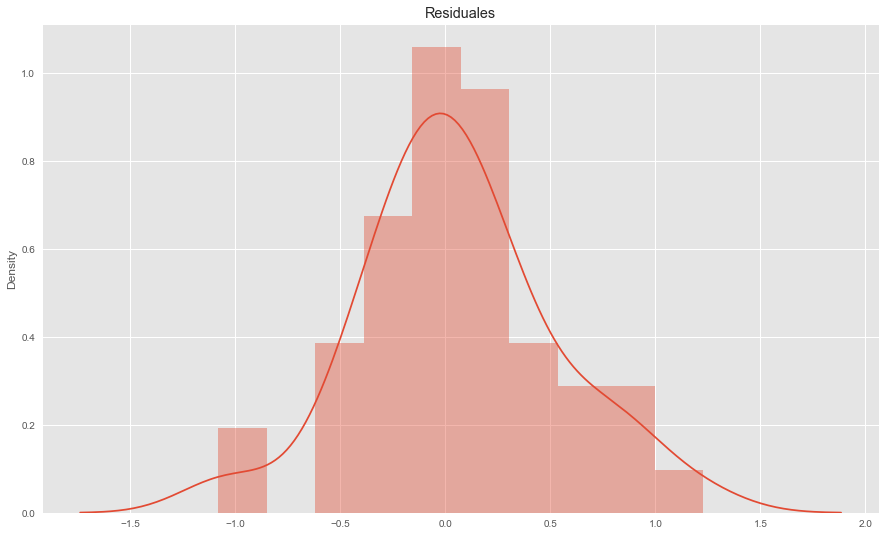

In [33]:
sns.distplot(residuales);
plt.title("Residuales")

{'whiskers': [<matplotlib.lines.Line2D at 0x259d4868970>,
 'caps': [<matplotlib.lines.Line2D at 0x259d4868f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x259d48687f0>],
 'medians': [<matplotlib.lines.Line2D at 0x259d48694b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x259d4869780>],
 'means': []}

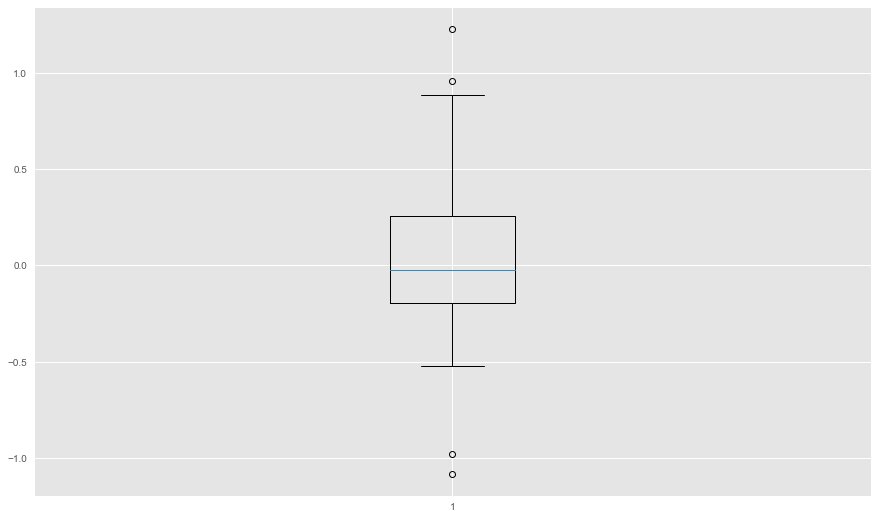

In [34]:
plt.boxplot(residuales)

In [35]:
normaltest(residuales)

NormaltestResult(statistic=array([1.29963221]), pvalue=array([0.52214179]))

Podemos ver que los residuos siguen una distribución normal puesto que no se puede rechazar la hipotesis nula de normalidad porque el valor de p es mayor a 0.05

0.9288306771086017

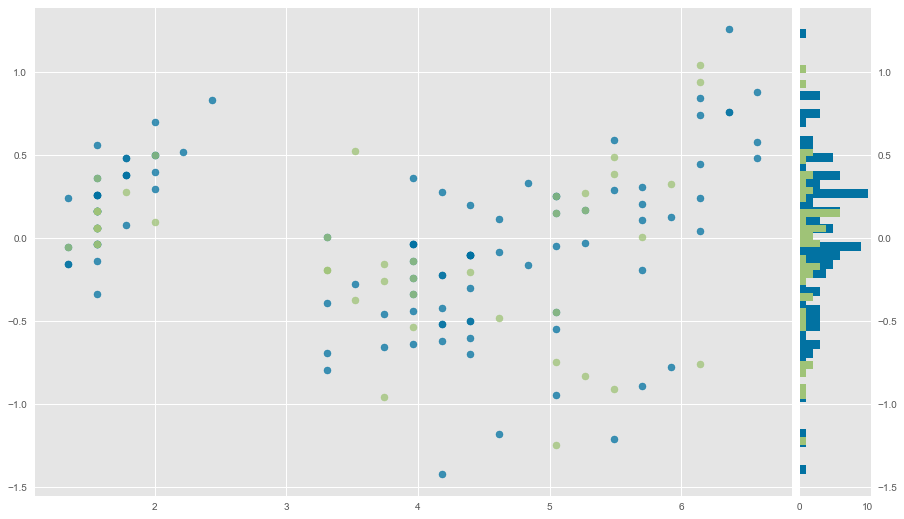

In [36]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(p_width,p_length)
visualizer.score(p_width_t,p_length_t)

A pesar de que los residuales parecen no ser normales si están distribuidos aleatoriamente alrededor de 0. Vamos ahora a analizar el coeficiente de la variable independiente

### Análisis de coeficientes

Si los coeficientes de la variable independiente son 0, esta no es un buen predictor.  
**H0:** Los coeficientes son igual a 0  
**H1:** Los coeficientes son distintos de 0

In [38]:
est = sm.OLS(p_length,p_width)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              3110.
Date:                Fri, 11 Mar 2022   Prob (F-statistic):                    2.62e-79
Time:                        18:27:45   Log-Likelihood:                         -118.65
No. Observations:                 105   AIC:                                      239.3
Df Residuals:                     104   BIC:                                      241.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Como se puede ver el $R^2$ es de 0.96 por lo que el modelo explica muy bien los datos el valor de P es menor a 0.05 por lo que podemos decir que se rechaza la hipótesis nula de que los coeficientes son 0 por lo que el ancho del pétalo es un buen predictor de su longitud.